In [1]:
# importing Datasets

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

n=list(range(1,43))
n.append('class')
train=pd.read_excel('trainset_60.xls',header=None,names=n)   
test=pd.read_excel('testset_20.xls',header=None,names=n)
cv=pd.read_excel('validate_20.xls',header=None,names=n)

In [2]:
train.head()  # train dataset

,1,2,3,4,5,6,7,8,9,10,...,34,35,36,37,38,39,40,41,42,class
0,-0.979398,-0.995127,-0.990196,-0.989030,-0.985714,-0.988102,-0.974542,-0.999877,-0.960534,-0.997655,...,-0.944312,-0.968071,0.829432,0.954474,0.949455,0.878967,0.922631,0.901529,0.437854,1
1,-0.977015,-0.991844,-0.986153,-0.985407,-0.987160,-0.988733,-0.975126,-0.993990,-0.971040,-0.999994,...,-0.969842,-0.958990,0.686442,0.956677,0.967947,0.843794,0.959571,0.871526,0.377164,1
2,-0.977214,-0.995317,-0.988394,-0.990684,-0.984565,-0.979365,-0.976852,-0.996106,-0.970861,-0.995631,...,-0.984499,-0.991658,0.850845,0.962474,0.867820,0.924592,0.920010,0.753506,0.662129,1
3,-0.975696,-0.993981,-0.987117,-0.986670,-0.988736,-0.987517,-0.976174,-0.978601,-0.985156,-0.999917,...,-0.979154,-0.983933,0.573253,0.932368,0.895771,0.784650,0.992828,0.946348,0.461835,1
4,-0.973372,-0.991760,-0.985759,-0.987134,-0.987139,-0.983848,-0.974375,-0.994321,-0.986975,-0.997641,...,-0.992241,-0.981634,0.894333,0.983818,0.925090,0.908474,0.927931,0.901710,0.590814,1


In [3]:
train.info()   # checking info. of train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19776 entries, 0 to 19775
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       19776 non-null  float64
 1   2       19776 non-null  float64
 2   3       19776 non-null  float64
 3   4       19776 non-null  float64
 4   5       19776 non-null  float64
 5   6       19776 non-null  float64
 6   7       19776 non-null  float64
 7   8       19776 non-null  float64
 8   9       19776 non-null  float64
 9   10      19776 non-null  float64
 10  11      19776 non-null  float64
 11  12      19776 non-null  float64
 12  13      19776 non-null  float64
 13  14      19776 non-null  float64
 14  15      19776 non-null  float64
 15  16      19776 non-null  float64
 16  17      19776 non-null  float64
 17  18      19776 non-null  float64
 18  19      19776 non-null  float64
 19  20      19776 non-null  float64
 20  21      19776 non-null  float64
 21  22      19776 non-null  float64
 22

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       7040 non-null   float64
 1   2       7040 non-null   float64
 2   3       7040 non-null   float64
 3   4       7040 non-null   float64
 4   5       7040 non-null   float64
 5   6       7040 non-null   float64
 6   7       7040 non-null   float64
 7   8       7040 non-null   float64
 8   9       7040 non-null   float64
 9   10      7040 non-null   float64
 10  11      7040 non-null   float64
 11  12      7040 non-null   float64
 12  13      7040 non-null   float64
 13  14      7040 non-null   float64
 14  15      7040 non-null   float64
 15  16      7040 non-null   float64
 16  17      7040 non-null   float64
 17  18      7040 non-null   float64
 18  19      7040 non-null   float64
 19  20      7040 non-null   float64
 20  21      7040 non-null   float64
 21  22      7040 non-null   float64
 22  

In [5]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7040 entries, 0 to 7039
Data columns (total 43 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       7040 non-null   float64
 1   2       7040 non-null   float64
 2   3       7040 non-null   float64
 3   4       7040 non-null   float64
 4   5       7040 non-null   float64
 5   6       7040 non-null   float64
 6   7       7040 non-null   float64
 7   8       7040 non-null   float64
 8   9       7040 non-null   float64
 9   10      7040 non-null   float64
 10  11      7040 non-null   float64
 11  12      7040 non-null   float64
 12  13      7040 non-null   float64
 13  14      7040 non-null   float64
 14  15      7040 non-null   float64
 15  16      7040 non-null   float64
 16  17      7040 non-null   float64
 17  18      7040 non-null   float64
 18  19      7040 non-null   float64
 19  20      7040 non-null   float64
 20  21      7040 non-null   float64
 21  22      7040 non-null   float64
 22  

In [6]:
# function to check null value present in any column

def null(x):
    x=(list(x.isnull().sum()))
    c=0
    p=[]
    for i in range(len(x)):
        if x[i]!=0:
            p.append(i+1)
            c=c+1
    if c==0:
        return 0
    else:
        return p

In [7]:
print(f'in train null columns: {null(train)}')
print(f'in test null columns: {null(test)}')
print(f'in cv null columns: {null(cv)}')

in train null columns: 0
in test null columns: 0
in cv null columns: 0


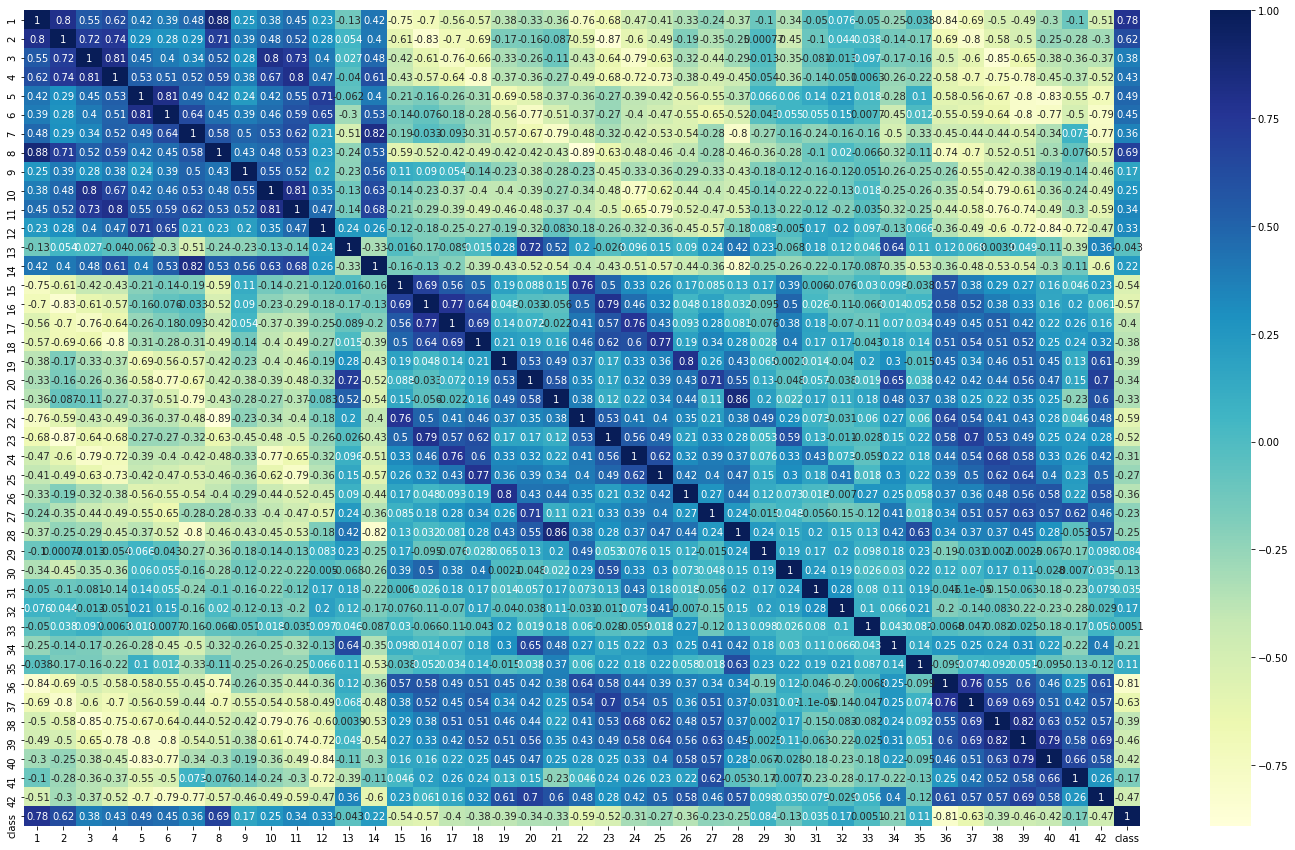

In [8]:
# plotting correlation between all columns
correlation=train.corr()
plt.figure(figsize=(25,15))
sns.heatmap(correlation,annot=True,cmap='YlGnBu')
plt.show()

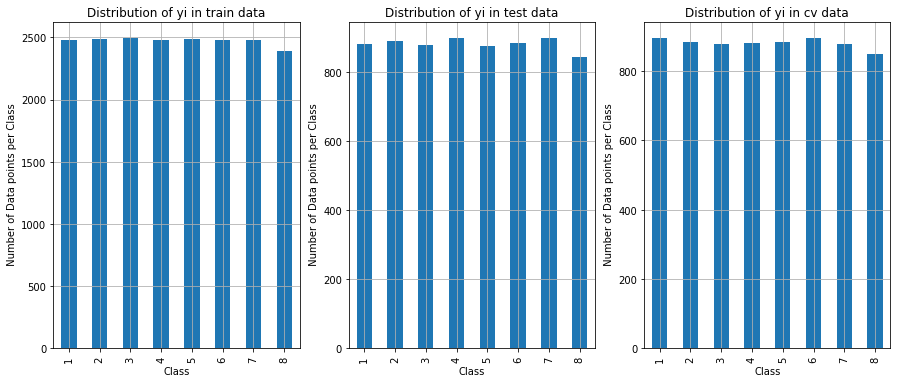

In [8]:
# counting datapoints for each class
    
train_class_distribution = train['class'].value_counts().sort_index()
test_class_distribution = test['class'].value_counts().sort_index()
cv_class_distribution = cv['class'].value_counts().sort_index()

# plotting class vs. number of datapoints

plt.figure(figsize=(15,6))
plt.subplot(131)
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()

plt.subplot(132)
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()

plt.subplot(133)
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel(' Number of Data points per Class')
plt.title('Distribution of yi in cv data')
plt.grid()
plt.show()

Data is well distributed (for all 8 class)

In [9]:
train_x=train.drop('class',1)  # training input
train_y=train['class']         # training output

test_x=test.drop('class',1)    # testing input
test_y=test['class']           # testing output

cv_x=cv.drop('class',1)        # validation input
cv_y=cv['class']               # validation output

### required functions

In [10]:
# function to plot confusion matrix

def plot_confusion_matrix(test_y, pred_y):
    C = metrics.confusion_matrix(test_y, pred_y)
    labels = [1,2,3,4,5,6,7,8]
    # representing in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

In [11]:
# function to predict output and plot confusion matrix

def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, model):
    model.fit(train_x, train_y)
    cal_model = CalibratedClassifierCV(model, method="sigmoid")
    cal_model.fit(train_x, train_y)
    pred_y = cal_model.predict(test_x)

    # calculating f1_score(micro) or accuracy
    print(f"f1_score :{metrics.f1_score(test_y, pred_y,average='micro')}")
    # calculating the number of data points that are misclassified
    print(f"Number of mis-classified points :{np.count_nonzero((pred_y- test_y))*100/test_y.shape[0]} %")
    plot_confusion_matrix(test_y, pred_y)

In [12]:
# function to combine the train and validation dataset

def combine_data(train_x,train_y,cv_x,cv_y):
    comb_train_x=pd.concat([train_x,cv_x],axis=0)
    comb_train_y=pd.concat([train_y,cv_y],axis=0)
    return comb_train_x,comb_train_y

#### Scaling the dataset (mean=0 , std. dev.=1)

In [13]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_train_x=scaler.fit_transform(train_x)
scaled_test_x=scaler.fit_transform(test_x)
scaled_cv_x=scaler.fit_transform(cv_x)

In [14]:
np.round(scaled_train_x.std(axis=0),3)     # checking unit variance

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
# scaled data is array. so converting it into dataframe

cols=train_x.columns
scaled_train_x_df=pd.DataFrame(data=scaled_train_x,columns=cols)
scaled_test_x_df=pd.DataFrame(data=scaled_test_x,columns=cols)
scaled_cv_x_df=pd.DataFrame(data=scaled_cv_x,columns=cols)

In [16]:
# combining train and validation datasets

(final_train_x,final_train_y)=combine_data(scaled_train_x_df,train_y,scaled_cv_x_df,cv_y)

In [17]:
scaled_train_x_df.shape

(19776, 42)

In [18]:
scaled_cv_x_df.shape

(7040, 42)

In [19]:
final_train_x.shape

(26816, 42)

#  Random Forest

1.finding best parameter alpha(number of trees) for MultinomialNB using cv dataset

In [20]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.calibration import CalibratedClassifierCV

In [14]:
alpha = [100,200,500]
max_depth=[10,15]
cv_error=[]
for i in alpha:
    for j in max_depth:
        print(f'n_estimator={i}, max_depth={j}:')
        model=RandomForestClassifier(n_estimators=i,max_depth=j,random_state=100,n_jobs=-1)
        model.fit(train_x,train_y)
        cal_model=CalibratedClassifierCV(model,method="sigmoid")
        cal_model.fit(train_x,train_y)

        cal_model_pred=cal_model.predict(cv_x)
        cv_error.append(metrics.f1_score(cv_y,cal_model_pred,average='micro'))
        print(f"report:\n{metrics.classification_report(cv_y,cal_model_pred,digits=3)}")
        print('*'*50)

n_estimator=100, max_depth=10:
report:
              precision    recall  f1-score   support

           1      1.000     0.997     0.998       894
           2      0.989     0.998     0.993       882
           3      0.982     0.991     0.986       878
           4      0.915     0.890     0.902       881
           5      0.988     0.992     0.990       884
           6      0.918     0.952     0.935       895
           7      0.918     0.928     0.923       878
           8      0.999     0.956     0.977       848

    accuracy                          0.963      7040
   macro avg      0.963     0.963     0.963      7040
weighted avg      0.963     0.963     0.963      7040

**************************************************
n_estimator=100, max_depth=15:
report:
              precision    recall  f1-score   support

           1      1.000     0.999     0.999       894
           2      0.989     0.999     0.994       882
           3      0.988     0.994     0.991       878
   

KeyboardInterrupt: 

best chosen parameters: ```n_estimator=200, max_depth=15```

In [21]:
#final RF model without scaled data:

model=RandomForestClassifier(n_estimators=200,max_depth=15,random_state=100,n_jobs=-1)
model.fit(train_x,train_y)
cal_model=CalibratedClassifierCV(model,method="sigmoid")
cal_model.fit(train_x,train_y)

cal_model_pred=cal_model.predict(cv_x)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_model_pred,average='micro')}")
cal_model_pred=cal_model.predict(train_x)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_model_pred,average='micro')}")
cal_model_pred=cal_model.predict(test_x)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_model_pred,average='micro')}")

f1_score of cv set:0.9707386363636363
f1_score of train set:0.9986852750809061
f1_score of test set:0.9711647727272728


In [22]:
#final RF model with scaled data:

model2=RandomForestClassifier(n_estimators=200,max_depth=15,random_state=100,n_jobs=-1)
model2.fit(final_train_x,final_train_y)
cal_model2=CalibratedClassifierCV(model2,method="sigmoid")
cal_model2.fit(final_train_x,final_train_y)

cal_model2_pred=cal_model2.predict(scaled_cv_x)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_model2_pred,average='micro')}")
cal_model2_pred=cal_model2.predict(scaled_train_x)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_model2_pred,average='micro')}")
cal_model2_pred=cal_model2.predict(scaled_test_x)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_model2_pred,average='micro')}")

f1_score of cv set:0.9967329545454545
f1_score of train set:0.9977750809061489
f1_score of test set:0.9785511363636363


since train and test score has very small differece, we can conclude that classifier is not overfitting

f1_score :0.9785511363636363
Number of mis-classified points :2.1448863636363638 %
-------------------- Confusion matrix --------------------


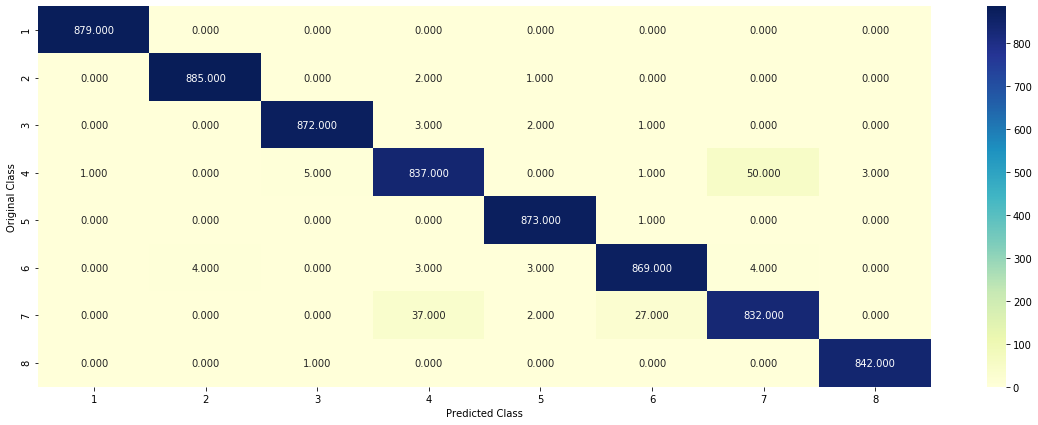

In [37]:
predict_and_plot_confusion_matrix(final_train_x, final_train_y,scaled_test_x,test_y,model2)

# SGDClassifier (Logistic regression)

1) parameter tuning(alpha=learning rate) on cv dataset

In [37]:
alpha=[10**x for x in range(-6,3)]
for i in alpha:
    lr=SGDClassifier(loss='log',penalty='l2',alpha=i,random_state=100)
    lr.fit(scaled_train_x,train_y)
    cal_lr=CalibratedClassifierCV(lr,method="sigmoid")
    cal_lr.fit(scaled_train_x,train_y)
    
    cal_lr_pred=cal_lr.predict(scaled_cv_x)
    print(f'for alpha={i}:')
    print(f"f1_score={metrics.classification_report(cv_y,cal_lr_pred,digits=3)}")
    print("*"*50)

for alpha=1e-06:
f1_score=              precision    recall  f1-score   support

           1      1.000     0.998     0.999       894
           2      0.993     1.000     0.997       882
           3      0.974     0.985     0.980       878
           4      0.891     0.931     0.911       881
           5      0.993     0.999     0.996       884
           6      0.957     0.936     0.946       895
           7      0.931     0.908     0.919       878
           8      0.994     0.974     0.984       848

    accuracy                          0.966      7040
   macro avg      0.967     0.966     0.966      7040
weighted avg      0.967     0.966     0.966      7040

**************************************************
for alpha=1e-05:
f1_score=              precision    recall  f1-score   support

           1      1.000     0.996     0.998       894
           2      0.992     1.000     0.996       882
           3      0.978     0.981     0.980       878
           4      0.905     0

best parameter= ```alpha=0.0001```

In [23]:
# final lr model

lr=SGDClassifier(loss='log',penalty='l2',alpha=0.0001,random_state=100)
lr.fit(final_train_x,final_train_y)
cal_lr=CalibratedClassifierCV(lr,method="sigmoid")
cal_lr.fit(final_train_x,final_train_y)

cal_lr_pred=cal_lr.predict(scaled_cv_x)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_lr_pred,average='micro')}")
cal_lr_pred=cal_lr.predict(scaled_train_x)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_lr_pred,average='micro')}")
cal_lr_pred=cal_lr.predict(scaled_test_x)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_lr_pred,average='micro')}")

f1_score of cv set:0.971875
f1_score of train set:0.9749696601941747
f1_score of test set:0.9748579545454545


no overfitting

f1_score :0.9748579545454545
Number of mis-classified points :2.5142045454545454 %
-------------------- Confusion matrix --------------------


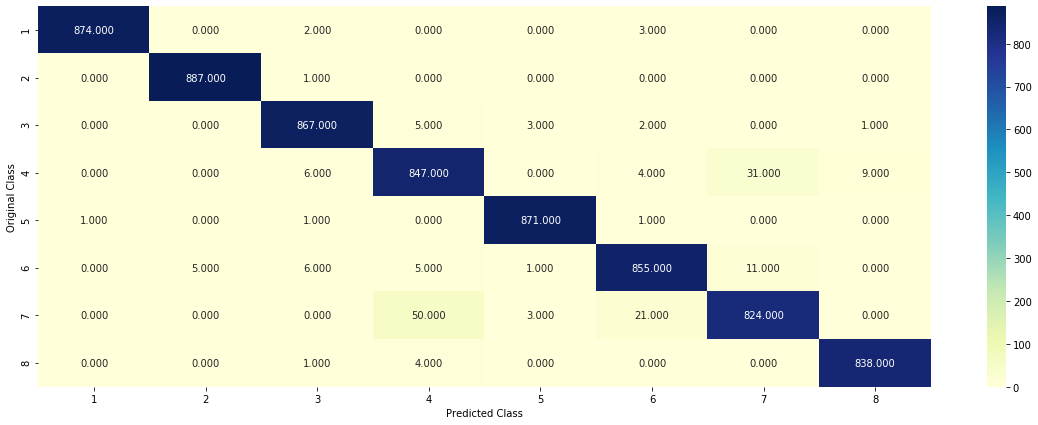

In [33]:
predict_and_plot_confusion_matrix(final_train_x, final_train_y, scaled_test_x, test_y, lr)

# SGDClassifier(linear SVM)

parameter tunning (alpha) on cv dataset

In [45]:
alpha=[10**x for x in range(-6,3)]
for i in alpha:
    svm=SGDClassifier(loss='hinge',penalty='l2',alpha=i,random_state=100)
    svm.fit(scaled_train_x,train_y)
    cal_svm=CalibratedClassifierCV(svm,method="sigmoid")
    cal_svm.fit(scaled_train_x,train_y)
    
    cal_svm_pred=cal_svm.predict(scaled_cv_x)
    print(f'for alpha={i}:')
    print(f"f1_score={metrics.classification_report(cv_y,cal_svm_pred,digits=3)}")
    print("*"*50)

for alpha=1e-06:
f1_score=              precision    recall  f1-score   support

           1      1.000     0.998     0.999       894
           2      0.994     1.000     0.997       882
           3      0.972     0.978     0.975       878
           4      0.907     0.918     0.913       881
           5      0.989     0.999     0.994       884
           6      0.963     0.946     0.954       895
           7      0.919     0.927     0.923       878
           8      0.996     0.971     0.983       848

    accuracy                          0.967      7040
   macro avg      0.967     0.967     0.967      7040
weighted avg      0.967     0.967     0.967      7040

**************************************************
for alpha=1e-05:
f1_score=              precision    recall  f1-score   support

           1      1.000     0.997     0.998       894
           2      0.992     1.000     0.996       882
           3      0.977     0.984     0.981       878
           4      0.907     0

best para ```alpha=0.00001```

In [24]:
#final linear SVM model

svm=SGDClassifier(loss='hinge',penalty='l2',alpha=0.00001,random_state=100)
svm.fit(final_train_x,final_train_y)
cal_svm=CalibratedClassifierCV(svm,method="sigmoid")
cal_svm.fit(final_train_x,final_train_y)

cal_svm_pred=cal_svm.predict(scaled_cv_x)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_svm_pred,average='micro')}")
cal_svm_pred=cal_svm.predict(scaled_train_x)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_svm_pred,average='micro')}")
cal_svm_pred=cal_svm.predict(scaled_test_x)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_svm_pred,average='micro')}")

f1_score of cv set:0.9730113636363636
f1_score of train set:0.9771945792880259
f1_score of test set:0.9754261363636364


no overfitting

f1_score :0.9754261363636364
Number of mis-classified points :2.4573863636363638 %
-------------------- Confusion matrix --------------------


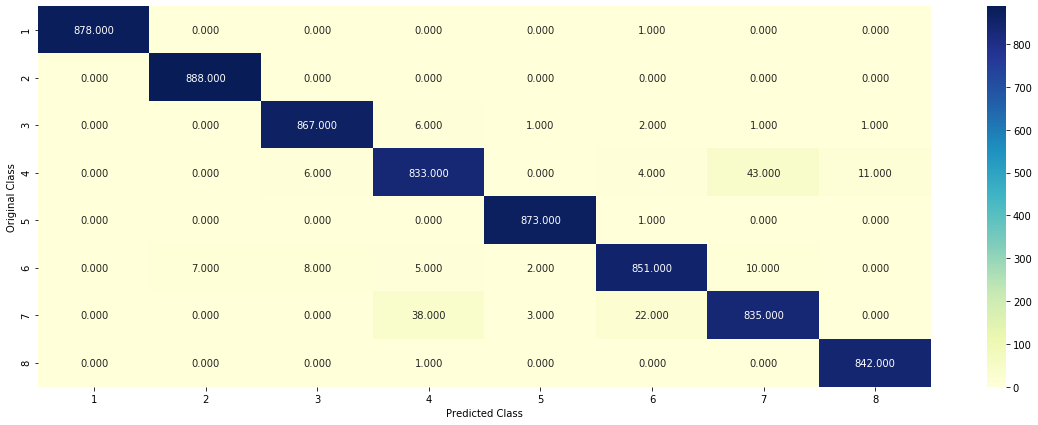

In [31]:
predict_and_plot_confusion_matrix(final_train_x, final_train_y, scaled_test_x, test_y, svm)

# SVM(with rbf)

parameter tunning (C, gamma) on cv dataset

In [26]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [56]:
c=[1,10,100,1000]
g=[0.1,0.01,0.001]
for i in c:
    for j in g:
        svm2=SVC(C=i,gamma=j,kernel='rbf')
        svm2.fit(scaled_train_x,train_y)
        cal_svm2=CalibratedClassifierCV(svm2, method="sigmoid")
        cal_svm2.fit(scaled_train_x,train_y)

        cal_svm2_pred=cal_svm2.predict(scaled_cv_x)
        print(f'for c={i} , gamma={j}:')
        print(f"report={metrics.classification_report(cv_y,cal_svm2_pred,digits=3)}")
        print("*"*50)

for c=1 , gamma=0.1:
report=              precision    recall  f1-score   support

           1      0.942     0.999     0.970       894
           2      0.994     0.999     0.997       882
           3      0.980     0.994     0.987       878
           4      0.937     0.926     0.932       881
           5      0.985     0.997     0.991       884
           6      0.966     0.958     0.962       895
           7      0.937     0.932     0.934       878
           8      1.000     0.932     0.965       848

    accuracy                          0.967      7040
   macro avg      0.968     0.967     0.967      7040
weighted avg      0.968     0.967     0.967      7040

**************************************************
for c=1 , gamma=0.01:
report=              precision    recall  f1-score   support

           1      1.000     1.000     1.000       894
           2      0.997     1.000     0.998       882
           3      0.985     0.997     0.991       878
           4      0.935 

best parameters: ```C=10, gamma=0.01```

In [43]:
# final SVM(rbf) model

svm2=SVC(C=10,gamma=0.01,kernel='rbf')
svm2.fit(final_train_x,final_train_y)
cal_svm2=CalibratedClassifierCV(svm2, method="sigmoid")
cal_svm2.fit(final_train_x,final_train_y)

cal_svm2_pred=cal_svm2.predict(scaled_cv_x_df)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_svm2_pred,average='micro')}")
cal_svm2_pred=cal_svm2.predict(scaled_train_x_df)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_svm2_pred,average='micro')}")
cal_svm2_pred=cal_svm2.predict(scaled_test_x_df)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_svm2_pred,average='micro')}")

f1_score of cv set:0.9928977272727273
f1_score of train set:0.9953984627831716
f1_score of test set:0.9899147727272727


no overfitting

f1_score :0.9899147727272727
Number of mis-classified points :1.0085227272727273 %
-------------------- Confusion matrix --------------------


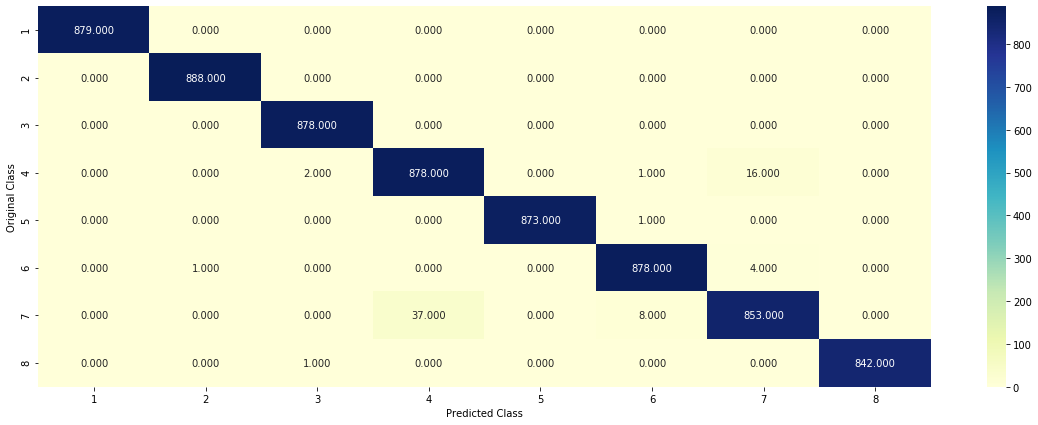

In [44]:
predict_and_plot_confusion_matrix(final_train_x, final_train_y, scaled_test_x, test_y, svm2)

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [40]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(scaled_train_x,train_y)
cal_knn=CalibratedClassifierCV(knn, method='sigmoid')
cal_knn.fit(scaled_train_x,train_y)

cal_knn_pred=cal_knn.predict(scaled_cv_x)
print(metrics.classification_report(cv_y,cal_knn_pred,digits=3))

              precision    recall  f1-score   support

           1      1.000     0.996     0.998       894
           2      0.987     0.995     0.991       882
           3      0.977     0.985     0.981       878
           4      0.901     0.891     0.896       881
           5      0.966     0.973     0.970       884
           6      0.908     0.924     0.916       895
           7      0.909     0.908     0.908       878
           8      0.996     0.971     0.983       848

    accuracy                          0.955      7040
   macro avg      0.956     0.955     0.955      7040
weighted avg      0.955     0.955     0.955      7040



taking long time and not that much of accuracy. So discarding this model

# Stacking

1) fitting chosen models: logistic Regration, Random Forest, SVM(rbf) 

In [27]:
lr=SGDClassifier(loss='log',penalty='l2',alpha=0.0001,random_state=100)
lr.fit(final_train_x,final_train_y)
cal_lr=CalibratedClassifierCV(lr,method="sigmoid")
cal_lr.fit(final_train_x,final_train_y)
cal_lr_pred=cal_lr.predict(scaled_cv_x)

model2=RandomForestClassifier(n_estimators=200,max_depth=15,random_state=100,n_jobs=-1)
model2.fit(final_train_x,final_train_y)
cal_model2=CalibratedClassifierCV(model2,method="sigmoid")
cal_model2.fit(final_train_x,final_train_y)
cal_model2_pred=cal_model2.predict(scaled_cv_x)

svm2=SVC(C=10,gamma=0.01,kernel='rbf')
svm2.fit(final_train_x,final_train_y)
cal_svm2=CalibratedClassifierCV(svm2, method="sigmoid")
cal_svm2.fit(final_train_x,final_train_y)
cal_svm2_pred=cal_svm2.predict(scaled_cv_x_df)


print(f"SGDlr :{metrics.f1_score(cv_y,cal_lr_pred,average='micro')}")
print(f"RF    :{metrics.f1_score(cv_y,cal_model2_pred,average='micro')}")
print(f"SVM   :{metrics.f1_score(cv_y,cal_svm2_pred,average='micro')}")

print("-"*50)



SGDlr :0.971875
RF    :0.9967329545454545
SVM   :0.9928977272727273
--------------------------------------------------


2) parameter tunning (C)

In [28]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [60]:
alpha = [0.00001,0.0001,0.001,0.01,0.1] 
best_alpha = 999
for i in alpha:
    logiReg = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[cal_lr, cal_svm2, cal_model2], meta_classifier=logiReg, use_probas=True)
    sclf.fit(scaled_train_x, train_y)
    print("Stacking Classifer : for the value of alpha: %f f1_score: %f" % (i, metrics.f1_score(cv_y, sclf.predict(scaled_cv_x), average='micro')))
    

Stacking Classifer : for the value of alpha: 0.000010 f1_score: 0.976989
Stacking Classifer : for the value of alpha: 0.000100 f1_score: 0.981818
Stacking Classifer : for the value of alpha: 0.001000 f1_score: 0.981818
Stacking Classifer : for the value of alpha: 0.010000 f1_score: 0.981392
Stacking Classifer : for the value of alpha: 0.100000 f1_score: 0.980966


best para: ```C=0.0001```

f1_score (train) on the stacking classifier : 0.9960052588996764
f1_score (CV) on the stacking classifier : 0.9943181818181818
f1_score (test) on the stacking classifier : 0.9879261363636364
**************************************************
Number of missclassified point :1.2073863636363635 %
-------------------- Confusion matrix --------------------


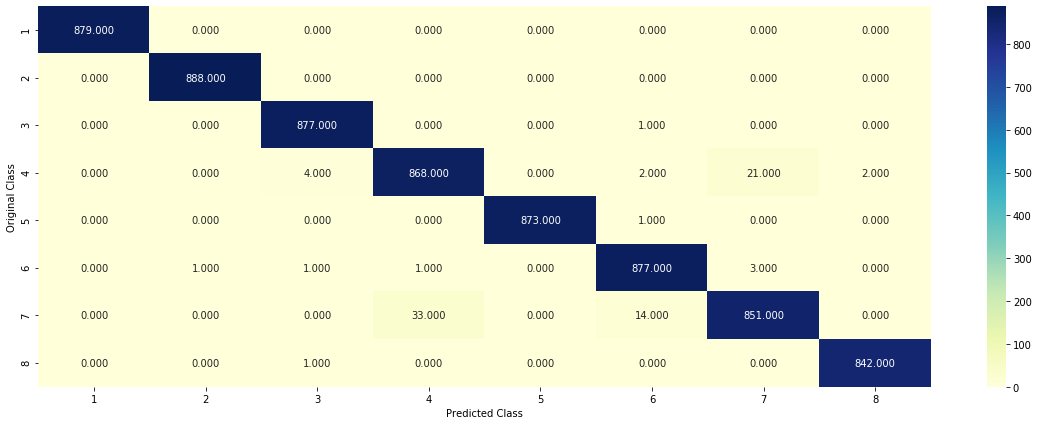

In [29]:
# final model with lr, SVM, RF

logiReg = LogisticRegression(C=0.0001)
sclf = StackingClassifier(classifiers=[cal_lr, cal_svm2, cal_model2], meta_classifier=logiReg, use_probas=True)
sclf.fit(final_train_x, final_train_y)

f1 = metrics.f1_score(train_y, sclf.predict(scaled_train_x), average='micro')
print("f1_score (train) on the stacking classifier :",f1)

f1 = metrics.f1_score(cv_y, sclf.predict(scaled_cv_x), average='micro')
print("f1_score (CV) on the stacking classifier :",f1)

f1 = metrics.f1_score(test_y, sclf.predict(scaled_test_x), average='micro')
print("f1_score (test) on the stacking classifier :",f1)
print('*'*50)
print(f"Number of missclassified point :{np.count_nonzero((sclf.predict(scaled_test_x)- test_y))*100/test_y.shape[0]} %")
plot_confusion_matrix(test_y, sclf.predict(scaled_test_x))

f1_score (train) on the stacking classifier : 0.9967131877022654
f1_score (CV) on the stacking classifier : 0.9951704545454545
f1_score (test) on the stacking classifier : 0.9887784090909091
**************************************************
Number of missclassified point :1.1221590909090908 %
-------------------- Confusion matrix --------------------


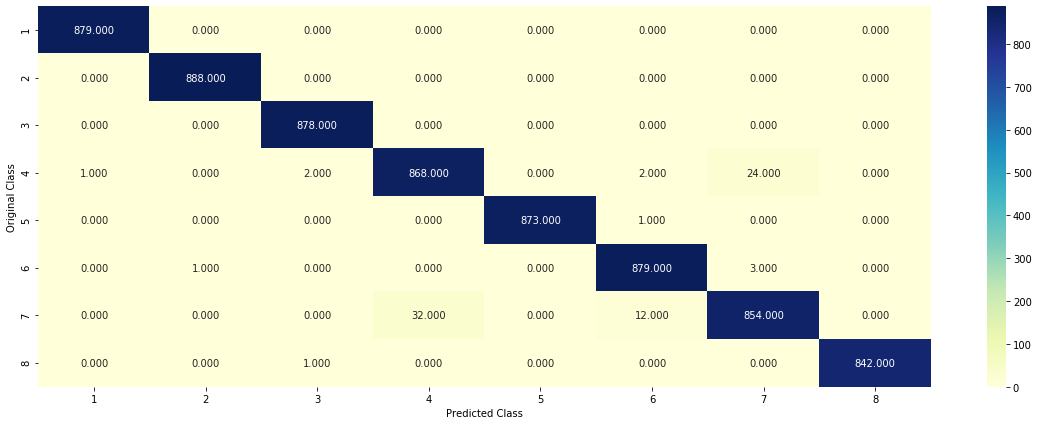

In [65]:
# final model with SVM, RF

logiReg = LogisticRegression(C=0.0001)
sclf = StackingClassifier(classifiers=[cal_svm2, cal_model2], meta_classifier=logiReg, use_probas=True)
sclf.fit(final_train_x, final_train_y)

f1 = metrics.f1_score(train_y, sclf.predict(scaled_train_x), average='micro')
print("f1_score (train) on the stacking classifier :",f1)

f1 = metrics.f1_score(cv_y, sclf.predict(scaled_cv_x), average='micro')
print("f1_score (CV) on the stacking classifier :",f1)

f1 = metrics.f1_score(test_y, sclf.predict(scaled_test_x), average='micro')
print("f1_score (test) on the stacking classifier :",f1)
print('*'*50)
print(f"Number of missclassified point :{np.count_nonzero((sclf.predict(scaled_test_x)- test_y))*100/test_y.shape[0]} %")
plot_confusion_matrix(test_y, sclf.predict(scaled_test_x))

# AdaBoost

In [67]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [75]:
lr2=SGDClassifier(loss='log',penalty='l2',verbose=0)
abc=AdaBoostClassifier(n_estimators=50,base_estimator=lr2,learning_rate=2)
abc.fit(scaled_train_x,train_y)
abc_pred=abc.predict(scaled_cv_x)

print(metrics.classification_report(cv_y,abc_pred))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98       894
           2       0.99      0.99      0.99       882
           3       0.96      0.99      0.97       878
           4       0.82      0.87      0.84       881
           5       0.98      0.97      0.98       884
           6       0.91      0.96      0.93       895
           7       0.93      0.81      0.87       878
           8       0.96      0.99      0.98       848

    accuracy                           0.94      7040
   macro avg       0.94      0.94      0.94      7040
weighted avg       0.94      0.94      0.94      7040



Not giving good result and taking long time for computation, so discarded

# feature selection

## using RFECV

In [175]:
from sklearn.feature_selection import RFECV

In [194]:
# SVM (linear)
svm=SGDClassifier(loss='hinge',penalty='l2',alpha=0.00001,random_state=100)
rfe=RFECV(estimator=svm,step=1,cv=5)
rfe=rfe.fit(final_train_x,final_train_y)
print(rfe.ranking_)
print(rfe.n_features_)

[ 1  1  1  1  1  1  1 10  1  1  1  1  1  1  1  1  1  1  1  1  1 11  6  4
  1  1  1  2  8  7  1  5  9  1  3  1  1  1  1  1  1  1]
32


In [97]:
s=rfe.ranking_
x1=[]
for i in range(0,42):
    if s[i]!=1:
        x1.append(i+1)
x1 # name of columns to drop

[8, 22, 23, 24, 28, 29, 30, 32, 33, 35]

In [86]:
# RF
model2=RandomForestClassifier(n_estimators=200,max_depth=15,random_state=100,n_jobs=-1)
rfe2=RFECV(estimator=model2,step=1,cv=5)
rfe2=rfe2.fit(final_train_x,final_train_y)
print(rfe2.ranking_)
print(rfe2.n_features_)

[ 1  1  1  1  1  1  1  4  1  1  1  2  1  1  8  1  1  1  1  1  1 17  6 11
  9  1  7 10 14 12  3 16 13 15  1  1  1  1  1  5  1  1]
26


In [96]:
s1=rfe2.ranking_
x2=[]
for i in range(0,42):
    if s1[i]!=1:
        x2.append(i+1)
        
x2 # name of columns to drop

[8, 12, 15, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 33, 34, 40]

In [101]:
drop_col=[]
for i in range(len(x2)):
    for j in range(len(x1)):
        if x1[j]==x2[i]:
            drop_col.append(x1[j])
drop_col # name of common columns in x1 and x2 (to finally drop them)

[8, 22, 23, 24, 28, 29, 30, 32, 33]

#### droping selected columns

In [168]:
dropped_train_x=final_train_x.drop(columns=drop_col,axis=1)
dropped_scaled_train_x=scaled_train_x_df.drop(columns=drop_col,axis=1)
dropped_scaled_test_x=scaled_test_x_df.drop(columns=drop_col,axis=1)
dropped_scaled_cv_x=scaled_cv_x_df.drop(columns=drop_col,axis=1)

# Models after dropping columns

## SVM(rbf)

In [196]:
c=[1,10,100,1000]
g=[0.1,0.01,0.001]
for i in c:
    for j in g:
        svm0=SVC(C=i,gamma=j,kernel='rbf')
        svm0.fit(dropped_scaled_train_x,train_y)
        cal_svm0=CalibratedClassifierCV(svm0, method="sigmoid")
        cal_svm0.fit(dropped_scaled_train_x,train_y)

        cal_svm0_pred=cal_svm0.predict(dropped_scaled_cv_x)
        print(f'for c={i} , gamma={j}:')
        print(f"report={metrics.classification_report(cv_y,cal_svm0_pred,digits=3)}")
        print("*"*50)

for c=1 , gamma=0.1:
report=              precision    recall  f1-score   support

           1      0.989     1.000     0.994       894
           2      0.998     1.000     0.999       882
           3      0.981     1.000     0.990       878
           4      0.938     0.927     0.933       881
           5      0.995     1.000     0.998       884
           6      0.977     0.980     0.978       895
           7      0.941     0.936     0.938       878
           8      1.000     0.974     0.987       848

    accuracy                          0.977      7040
   macro avg      0.977     0.977     0.977      7040
weighted avg      0.977     0.977     0.977      7040

**************************************************
for c=1 , gamma=0.01:
report=              precision    recall  f1-score   support

           1      1.000     1.000     1.000       894
           2      0.997     1.000     0.998       882
           3      0.990     0.998     0.994       878
           4      0.939 

c=100, gamma=0.01

In [171]:
# final SVM(rbf) model(best model)

svm0=SVC(C=100,gamma=0.01,kernel='rbf')
svm0.fit(dropped_train_x,final_train_y)
cal_svm0=CalibratedClassifierCV(svm0, method="sigmoid")
cal_svm0.fit(dropped_train_x,final_train_y)

cal_svm0_pred=cal_svm0.predict(dropped_scaled_cv_x)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_svm0_pred,average='micro')}")
cal_svm0_pred=cal_svm0.predict(dropped_scaled_train_x)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_svm0_pred,average='micro')}")
cal_svm0_pred=cal_svm0.predict(dropped_scaled_test_x)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_svm0_pred,average='micro')}")

f1_score of cv set:0.9961647727272728
f1_score of train set:0.9976233818770227
f1_score of test set:0.9916193181818181


f1_score :0.9916193181818181
Number of mis-classified points :0.8380681818181818 %
-------------------- Confusion matrix --------------------


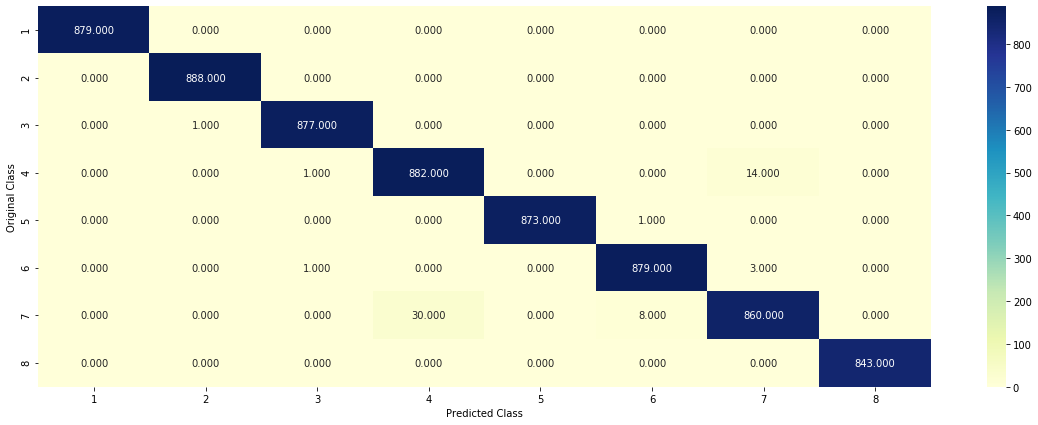

In [116]:
predict_and_plot_confusion_matrix(droped_train_x, final_train_y, droped_scaled_test_x, test_y, svm0)

## RF

In [176]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.calibration import CalibratedClassifierCV

In [179]:
alpha = [100,200,500]
max_depth=[10,15,20]
for i in alpha:
    for j in max_depth:
        model0=RandomForestClassifier(n_estimators=i,max_depth=j,random_state=100,n_jobs=-1)
        model0.fit(dropped_scaled_train_x,train_y)
        cal_model0=CalibratedClassifierCV(model0,method="sigmoid")
        cal_model0.fit(dropped_scaled_train_x,train_y)

        cal_model0_pred=cal_model0.predict(dropped_scaled_cv_x)
        print(f'n_estimator={i}, max_depth={j}:')
        print(f"report:\n{metrics.classification_report(cv_y,cal_model0_pred,digits=3)}")
        print('*'*50)

n_estimator=100, max_depth=10:
report:
              precision    recall  f1-score   support

           1      1.000     0.997     0.998       894
           2      0.988     0.997     0.992       882
           3      0.976     0.991     0.984       878
           4      0.919     0.873     0.895       881
           5      0.979     0.994     0.987       884
           6      0.935     0.945     0.940       895
           7      0.900     0.929     0.914       878
           8      0.999     0.967     0.983       848

    accuracy                          0.962      7040
   macro avg      0.962     0.962     0.962      7040
weighted avg      0.962     0.962     0.962      7040

**************************************************
n_estimator=100, max_depth=15:
report:
              precision    recall  f1-score   support

           1      1.000     0.999     0.999       894
           2      0.989     0.998     0.993       882
           3      0.982     0.998     0.990       878
   

n_estimators=500, max_depth=20

In [182]:
#final RF model with scaled data:

model0=RandomForestClassifier(n_estimators=500,max_depth=20,random_state=100,n_jobs=-1)
model0.fit(dropped_train_x,final_train_y)
cal_model0=CalibratedClassifierCV(model0,method="sigmoid")
cal_model0.fit(dropped_train_x,final_train_y)

cal_model0_pred=cal_model0.predict(dropped_scaled_cv_x)
print(f"f1_score of cv set:{metrics.f1_score(cv_y,cal_model0_pred,average='micro')}")
cal_model0_pred=cal_model0.predict(dropped_scaled_train_x)
print(f"f1_score of train set:{metrics.f1_score(train_y,cal_model0_pred,average='micro')}")
cal_model0_pred=cal_model0.predict(dropped_scaled_test_x)
print(f"f1_score of test set:{metrics.f1_score(test_y,cal_model0_pred,average='micro')}")

f1_score of cv set:0.9997159090909091
f1_score of train set:0.9996460355987055
f1_score of test set:0.9815340909090909


f1_score :0.9815340909090909
Number of mis-classified points :1.8465909090909092 %
-------------------- Confusion matrix --------------------


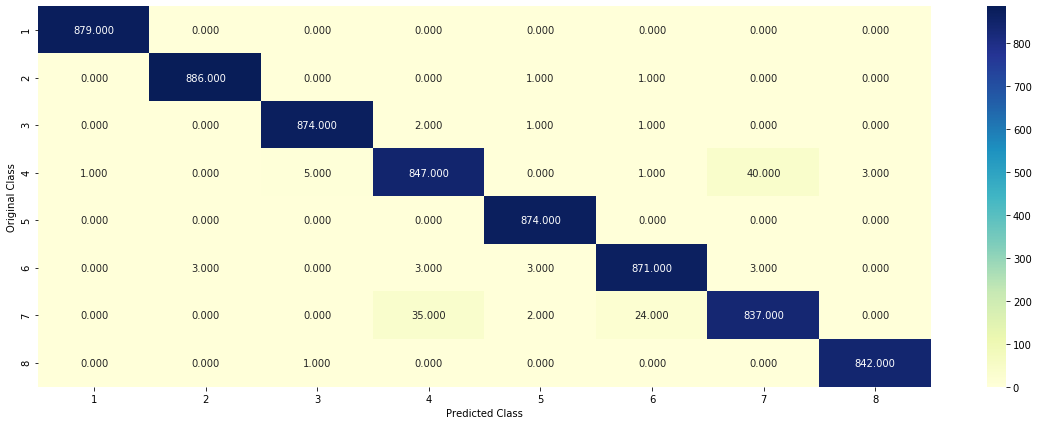

In [183]:
predict_and_plot_confusion_matrix(droped_train_x, final_train_y, droped_scaled_test_x, test_y, model0)

# stacking 

In [ ]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [184]:
# preparing models to pass into stacking

model2=RandomForestClassifier(n_estimators=500,max_depth=20,random_state=100,n_jobs=-1)
model2.fit(dropped_train_x,final_train_y)
cal_model2=CalibratedClassifierCV(model2,method="sigmoid")
cal_model2.fit(dropped_train_x,final_train_y)
cal_model2_pred=cal_model2.predict(dropped_scaled_cv_x)

svm2=SVC(C=100,gamma=0.01,kernel='rbf')
svm2.fit(dropped_train_x,final_train_y)
cal_svm2=CalibratedClassifierCV(svm2, method="sigmoid")
cal_svm2.fit(dropped_train_x,final_train_y)
cal_svm2_pred=cal_svm2.predict(dropped_scaled_cv_x)

print(f"RF    :{metrics.f1_score(cv_y,cal_model2_pred,average='micro')}")
print(f"SVM   :{metrics.f1_score(cv_y,cal_svm2_pred,average='micro')}")

print("-"*50)


RF    :0.9997159090909091
SVM   :0.9961647727272728
--------------------------------------------------


parameter tunning (C)

In [185]:
alpha = [0.00001,0.0001,0.001,0.01,0.1] 
for i in alpha:
    logiReg = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[cal_svm2, cal_model2], meta_classifier=logiReg, use_probas=True)
    sclf.fit(dropped_scaled_train_x, train_y)
    print("Stacking Classifer : for the value of alpha: %f f1_score: %f" % (i, metrics.f1_score(cv_y, sclf.predict(dropped_scaled_cv_x), average='micro')))
    

Stacking Classifer : for the value of alpha: 0.000010 f1_score: 0.950710
Stacking Classifer : for the value of alpha: 0.000100 f1_score: 0.982528
Stacking Classifer : for the value of alpha: 0.001000 f1_score: 0.983239
Stacking Classifer : for the value of alpha: 0.010000 f1_score: 0.983097
Stacking Classifer : for the value of alpha: 0.100000 f1_score: 0.982386


In [198]:
alpha = [0.0005,0.0006,0.0007,0.0008] 
for i in alpha:
    logiReg = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[cal_svm2, cal_model2], meta_classifier=logiReg, use_probas=True)
    sclf.fit(dropped_scaled_train_x, train_y)
    print("Stacking Classifer : for the value of alpha: %f f1_score: %f" % (i, metrics.f1_score(cv_y, sclf.predict(dropped_scaled_cv_x), average='micro')))
    

Stacking Classifer : for the value of alpha: 0.000600 f1_score: 0.983239


Stacking Classifer : for the value of alpha: 0.000500 f1_score: 0.983097

Stacking Classifer : for the value of alpha: 0.000700 f1_score: 0.983239

Stacking Classifer : for the value of alpha: 0.000800 f1_score: 0.983239

Stacking Classifer : for the value of alpha: 0.002000 f1_score: 0.98309

chosen ```alpha=0.001```

f1_score (train) on the stacking classifier : 0.9988369741100324
f1_score (CV) on the stacking classifier : 0.9975852272727272
f1_score (test) on the stacking classifier : 0.9910511363636364
**************************************************
Number of missclassified point :0.8948863636363636 %
-------------------- Confusion matrix --------------------


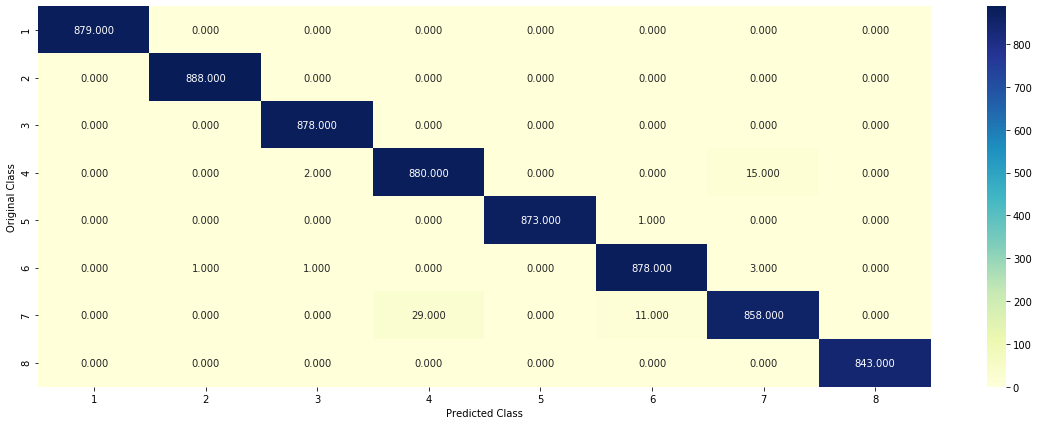

In [197]:
# final model with SVM, RF

logiReg = LogisticRegression(C=0.001)
sclf = StackingClassifier(classifiers=[cal_svm2, cal_model2], meta_classifier=logiReg, use_probas=True)
sclf.fit(dropped_train_x, final_train_y)

f1 = metrics.f1_score(train_y, sclf.predict(dropped_scaled_train_x), average='micro')
print("f1_score (train) on the stacking classifier :",f1)

f1 = metrics.f1_score(cv_y, sclf.predict(dropped_scaled_cv_x), average='micro')
print("f1_score (CV) on the stacking classifier :",f1)

f1 = metrics.f1_score(test_y, sclf.predict(dropped_scaled_test_x), average='micro')
print("f1_score (test) on the stacking classifier :",f1)
print('*'*50)
print(f"Number of missclassified point :{np.count_nonzero((sclf.predict(dropped_scaled_test_x)- test_y))*100/test_y.shape[0]} %")
plot_confusion_matrix(test_y, sclf.predict(dropped_scaled_test_x))

#### best models: 

    1) SVM(with rbf kernel) with reduced columns
        [f1_score :0.99162, mis-classified points :0.8380681818181818 %]
        
    2) Stacking( SVM(rbf), RandomForest) with reduced columns
        [f1_score :0.99105, mis-classified points :0.8948863636363636 %]